# (3) Gradient Decent 

(참고 : https://hunkim.github.io/ml/ )

!['HTMC'](https://miro.medium.com/max/1840/1*92Ac9THHMIMTt8V0us-vqg.png)

Grandient decent algorithm
- Minimize cost function
- Gradient descent is used many minimization problems
- For a given cost function, cost(W,b), it will find W,b to minimize cost
- It can be applied to more general function : cost(w1,w2,...)


- cost 함수 그래프를 그리면 위와같은 2차원 포물선이 그려집니다
- Gradient(경사) decent(내려감) 이라는 뜻
- Gradient Decent Algorithm
    - 최소화 문제의 경우에 많이 사용
    - cost(w1,w2,3...)등 다양한 변수가 있는 경우에도 사용 가능
    
## How it works?
- start with initial guesses
    - Start at 0,0(or any other value)
    - Keeping changing W and b a little bit to try and reduce cost(W,b)
- Each time you change the parameters, you select the gradient which reduces cost(W,b) the most possible
- Repeat
- Do so untill you converge to a local minimum
- Has an interesting property
    - Where you start can determine which you end up
    
!['2'](https://miro.medium.com/max/1840/1*cdVe5TrBgR2ezgOGi46B_w.png)

미분 후의 수식을 간단하기 위해서 2를 적는다.

![3](https://miro.medium.com/max/1850/1*W9ArbeR20mIbemc7spRs8g.png)

![4](https://miro.medium.com/max/1853/1*UkIjo17ovvd4deEEt-KgWA.png)

- 알파는 learning rate라는 상수값
- 알파에 cost 함수를 미분한 것(기울기)를 곱함
- 기울기가 양의 값이면 W를 감소, 
    기울기가 음의 값이면 W를 증가시키는 결과를 가져온다

![5](https://miro.medium.com/max/1848/1*Al2r4PvGphnuqCJ3-YaARg.png)

- cost function 이 위와 같은 형태이면 시작점에 따라 minimize 하는 부분이 달라짐, 즉 알고리즘이 제대로 작동하지 못합니다

![6](https://miro.medium.com/max/1853/1*qv-mdHrWNPAysWVvhXCV9A.png)

- Convex function 은 위와 같은 그래프 형태를 말합니다
- Gradient Decent 알고리즘은 위와 같이 cost function 이 Convex function 일 때는 항상 만족합니다

Minimizing Cost
이제 직접 코드를 확인토록 해보겠습니다.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = [1.,2.,3.]
Y = [1.,2.,3.]
m = n_samples = len(X)

In [11]:
# Set model weight
W = tf.placeholder(tf.float32)

placeholder : 학습용 데이타를 담는 그릇을 플레이스홀더라 한다.  

플레이스홀더에 대해서 알아보면, 플레이스 홀더의 위의 그래프에서 x 즉 입력값을 저장하는 일종의 통(버킷)이다.  

tf.placeholder(dtype,shape,name)으로 정의된다.  

플레이스 홀더 정의에 사용되는 변수들을 보면

- dtype : 플레이스홀더에 저장되는 데이타형이다. tf.float32와 같이 실수,정수등의 데이타 타입을 정의한다.
- shape : 행렬의 차원을 정의한다. shapre=[3,3]으로 정의해주면, 이 플레이스홀더는 3x3 행렬을 저장하게 된다.
- name : name은 이 플레이스 홀더의 이름을 정의한다. name에 대해서는 나중에 좀 더 자세하게 설명하도록 하겠다.


In [12]:
# placeholder 사용예제

input_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)
y = x * 2

sess = tf.Session()
result = sess.run(y,feed_dict={x:input_data})
# 위와 같이 세션을 통해서 그래프를 실행할 때, feed_dict 변수를 이용해서 플레이스홀더 x에, input_data를 피드하면, 세션에 의해서 그래프가 실행되면서 x는 feed_dict에 의해서 정해진 피드 데이타 [1,2,3,4,5]를 하나씩 읽어서 실행한다.

print(result)

[ 2.  4.  6.  8. 10.]


In [13]:
# Construct a linear model
hypothesis = tf.multiply(X, W)

In [14]:
# Cost function
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2))/(m)

In [19]:
# initializing the variables
init = tf.initialize_all_variables()

# 위 코드는 ‘cost = (예측치-실제치)² / m’ 공식을 코드로 작성한 것입니다. hypothesis는 W*X로 단순화했습니다.

In [20]:
# For graph
W_val = []
cost_val = []

-3.0 74.66667
-2.9000000000000004 70.98001
-2.8000000000000003 67.386665
-2.7 63.88667
-2.6 60.479992
-2.5 57.166668
-2.4000000000000004 53.94668
-2.3000000000000003 50.82
-2.2 47.786674
-2.1 44.84666
-2.0 42.0
-1.9000000000000001 39.246666
-1.8 36.586662
-1.7000000000000002 34.020004
-1.6 31.546667
-1.5 29.166668
-1.4000000000000001 26.880001
-1.3 24.686666
-1.2000000000000002 22.58667
-1.1 20.58
-1.0 18.666668
-0.9 16.846666
-0.8 15.120001
-0.7000000000000001 13.486667
-0.6000000000000001 11.946669
-0.5 10.5
-0.4 9.146666
-0.30000000000000004 7.886667
-0.2 6.7200003
-0.1 5.6466665
0.0 4.666667
0.1 3.7800002
0.2 2.9866672
0.30000000000000004 2.2866664
0.4 1.6800001
0.5 1.1666667
0.6000000000000001 0.7466666
0.7000000000000001 0.42000008
0.8 0.18666664
0.9 0.04666671
1.0 0.0
1.1 0.04666671
1.2000000000000002 0.18666676
1.3 0.4199999
1.4000000000000001 0.74666655
1.5 1.1666667
1.6 1.6800003
1.7000000000000002 2.2866673
1.8 2.9866662
1.9000000000000001 3.7799995
2.0 4.666667
2.1 5.646666

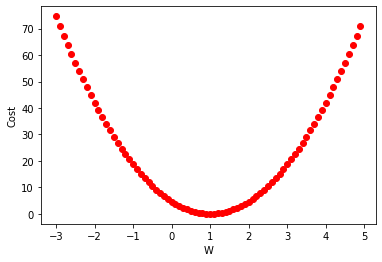

In [21]:
# Launch the graph
sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    print( i*0.1, sess.run(cost, feed_dict={W: i*0.1}))
    
    # 그래프를 위한 데이터 추가
    W_val.append( i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i*0.1}))

# Graphic display
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

- W가 1일 때 cost function이 최저
- 이를 convex function 이라고 부름
- gradient descent 알고리즘을 적용하기에 적합함을 알 수 있음

In [22]:
import tensorflow as tf
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]
# W에 -10부터 10까지 랜덤한 값을 부여,
# tf.random_uniform[1] : 랜덤한 값 '1개' 생성
# 랜덤 값 5개 생성은 tf.random_uniform[5]
W = tf.Variable(tf.random_uniform([1],-10.0, 10.0))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# 우리의 가정, 절편없이 단순화함
hyphothesis = W * X
# cost function
cost = tf.reduce_mean(tf.square(hyphothesis - Y))

In [25]:
# minimize
# Gradient Descent algorithm 부분
# learning rate는 0.1
descent = W - tf.multiply( 0.1, tf.reduce_mean(tf.multiply( (tf.multiply(W,X)-Y), X ) ))
# 이것은 단지 operation!
#= W.assign(descent)
#update = W.assign(descent)

In [26]:
# 변수 초기화
init = tf.initialize_all_variables()
# Launch the graph
sess = tf.Session()
sess.run(init)
# Fit the line
for step in range(20):
    sess.run(W.assign(descent), feed_dict={X:x_data, Y:y_data})
    print( step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

0 9.308622 [2.4123402]
1 2.6477847 [1.753248]
2 0.75314736 [1.4017322]
3 0.21422876 [1.2142572]
4 0.060936198 [1.1142706]
5 0.01733298 [1.0609443]
6 0.00493026 [1.0325036]
7 0.0014023874 [1.0173353]
8 0.00039890673 [1.0092455]
9 0.00011346765 [1.004931]
10 3.2276454e-05 [1.0026299]
11 9.180888e-06 [1.0014026]
12 2.6111077e-06 [1.000748]
13 7.4281866e-07 [1.000399]
14 2.1135264e-07 [1.0002128]
15 6.010365e-08 [1.0001135]
16 1.7114113e-08 [1.0000606]
17 4.862713e-09 [1.0000323]
18 1.3984476e-09 [1.0000173]
19 3.953886e-10 [1.0000092]
